In [1]:
%matplotlib inline
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
with open("/Users/pmigdal/Dropbox/Archive/pinboard_20170615.xml") as f:
    xml = f.read()

In [3]:
print(xml[:300])

<?xml version="1.0" encoding="UTF-8" ?>
<posts user="pmigdal">
<post href="https://vexlio.com/" time="2017-06-15T16:42:49Z" description="Vexlio - Instantly Create Precise, Beautiful Diagrams" extended="&lt;blockquote&gt;Easily create precise and beautiful diagrams with automatic snapping, embedded L


In [4]:
soup = BeautifulSoup(xml, 'lxml')

In [5]:
posts = soup.find_all('post')

In [6]:
posts[0].attrs['tag'].split(' ')

['diagram', 'drawing', 'latex']

In [7]:
df = pd.DataFrame([post.attrs for post in posts])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7704 entries, 0 to 7703
Data columns (total 9 columns):
description    7704 non-null object
extended       7704 non-null object
hash           7704 non-null object
href           7704 non-null object
meta           7704 non-null object
shared         125 non-null object
tag            7704 non-null object
time           7704 non-null object
toread         52 non-null object
dtypes: object(9)
memory usage: 541.8+ KB


In [8]:
df.head()

,description,extended,hash,href,meta,shared,tag,time,toread
0,"Vexlio - Instantly Create Precise, Beautiful D...",<blockquote>Easily create precise and beautifu...,53abd1dbcb9ef41d776ea40b570811a9,https://vexlio.com/,591013a7e9f797305def2ce6d3a58bde,NaN,diagram drawing latex,2017-06-15T16:42:49Z,NaN
1,Experimental evidence for compositional syntax...,,1e240ad20fc354aad0c84fd12c7893d1,https://www.nature.com/articles/ncomms10986,f775961b204e699ed013aa4fd67b5d13,NaN,language biology birds,2017-06-15T16:34:53Z,NaN
2,"How to tell the difference between shame, guil...",<blockquote>Therapists & Counselors in Portlan...,ab356f1639af14176a7e8e89cb08e3cf,http://www.portlandtherapycenter.com/blog/how-...,45c40a55182152b75c2706246a4edd41,NaN,emotions,2017-06-15T13:08:00Z,NaN
3,Twitter,RT @cjcrompton: How to make your tables less t...,42810d637104e66eab62b225f10678b4,https://twitter.com/i/web/status/8745829838518...,31b6b83a4149f41e9b5e4d875afdb535,NaN,,2017-06-14T23:29:39Z,NaN
4,gensim/keras_wrapper.ipynb at develop · RaRe-T...,#Gensim now integrates with #Keras! How?\nNote...,352d4b27351a76d13c34c9022e4858fd,https://github.com/RaRe-Technologies/gensim/bl...,4d74370e8090732dbc3648f3ede04030,NaN,,2017-06-14T08:58:09Z,NaN


In [9]:
df['time'] = pd.to_datetime(df['time'])

In [10]:
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

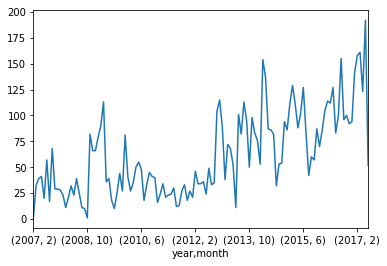

In [11]:
df.groupby(['year', 'month']).size().plot()

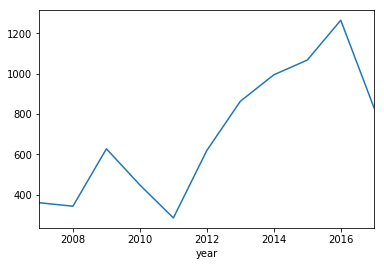

In [12]:
df.groupby(['year']).size().plot()

In [13]:
tag_dates = []
for post in posts:
    date = post.attrs['time']
    for tag in post.attrs['tag'].split(' '):
        if tag != '':
            tag_dates.append({'tag': tag, 'date': date})

In [14]:
len(tag_dates)

21009

In [15]:
tagtime = pd.DataFrame(tag_dates)
tagtime['date'] = pd.to_datetime(tagtime['date'])
tagtime['year'] = tagtime['date'].dt.year
tagtime['month'] = tagtime['date'].dt.month
tagtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21009 entries, 0 to 21008
Data columns (total 4 columns):
date     21009 non-null datetime64[ns]
tag      21009 non-null object
year     21009 non-null int64
month    21009 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 656.6+ KB


In [16]:
tagtime['tag'].value_counts().head(20)

physics             411
science             402
python              344
programming         292
math                260
javascript          226
humor               214
psychology          211
game                197
education           197
machine-learning    186
biology             180
academia            178
deep-learning       171
art                 166
visualization       155
hn                  138
data-science        136
quantum             131
blog                125
Name: tag, dtype: int64

In [17]:
tops = tagtime['tag'].value_counts().head(20).index
tagtime_tops = tagtime[tagtime['tag'].isin(tops)]

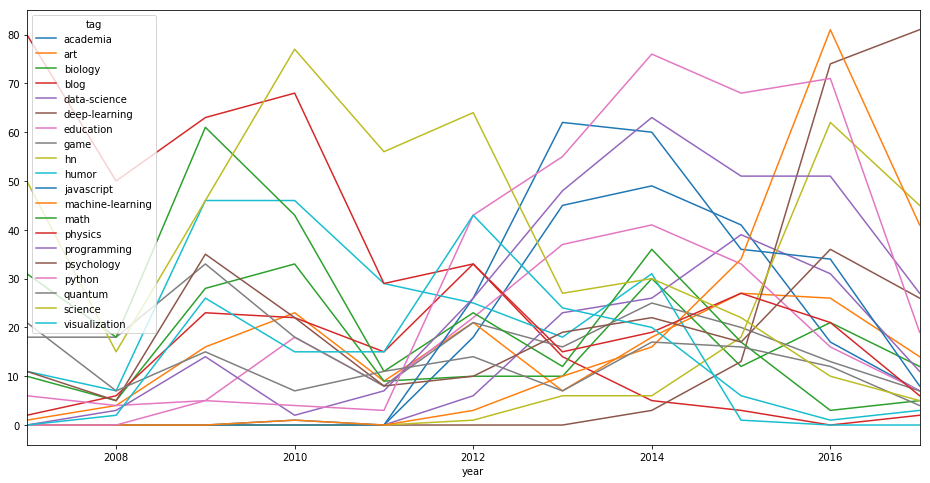

In [18]:
tagtime_tops.pivot_table(values='month', index=['year'], columns=['tag'], aggfunc='count', fill_value=0) \
  .plot(figsize=(16,8))

In [19]:
tagtime.pivot_table?

In [20]:
tagtime['tag'].value_counts().head(10)

physics        411
science        402
python         344
programming    292
math           260
javascript     226
humor          214
psychology     211
game           197
education      197
Name: tag, dtype: int64

In [21]:
tagtime.groupby(['year', 'tag']).size().reset_index().rename(columns={0: 'count'}) \
  .sort_values(by='count', ascending=False).groupby('year').first()

,tag,count
year,,
2007,physics,80
2008,physics,50
2009,physics,63
2010,science,77
2011,science,56
2012,science,64
2013,javascript,62
2014,python,76
2015,python,68


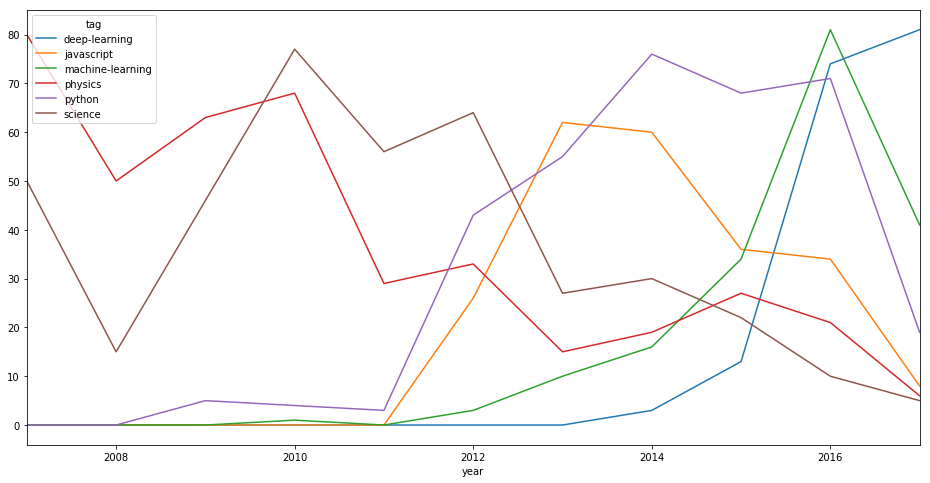

In [22]:
yearly_tags = tagtime.groupby(['year', 'tag']).size().reset_index().rename(columns={0: 'count'}) \
  .sort_values(by='count', ascending=False).groupby('year').first()['tag']
    

tagtime_tops2 = tagtime[tagtime['tag'].isin(yearly_tags)]
tagtime_tops2.pivot_table(values='month', index=['year'], columns=['tag'], aggfunc='count', fill_value=0) \
  .plot(figsize=(16,8))

In [23]:
tagtime[tagtime['year'] == 2007]['tag'].value_counts().head()

physics        80
science        50
polish         47
interesting    32
math           31
Name: tag, dtype: int64

In [24]:
tagtime.groupby(['year', 'tag']).size().reset_index().rename(columns={0: 'count'}) \
  .sort_values(by='count', ascending=False).groupby('year').nth([0,1,2]) \
  .reset_index().set_index(['year', 'tag'])

count
year tag                    
2007 science              50
     physics              80
     polish               47
2008 photography          19
     physics              50
     math                 18
2009 humor                46
     physics              63
     math                 61
2010 physics              68
     humor                46
     science              77
2011 humor                29
     science              56
     physics              29
2012 python               43
     visualization        43
     science              64
2013 programming          48
     python               55
     javascript           62
2014 javascript           60
     programming          63
     python               76
2015 r                    54
     python               68
     programming          51
2016 python               71
     deep-learning        74
     machine-learning     81
2017 hn                   45
     machine-learning     41
     deep-learning        81

In [25]:
tagtime.groupby(['year', 'month', 'tag']).size().reset_index().rename(columns={0: 'count'}) \
  .sort_values(by='count', ascending=False).groupby(['year', 'month']).first()

tag  count
year month                         
2007 2             microsoft      1
     3                polish     11
     4               science     14
     5               science     16
     6               physics      5
     7               physics     14
     8               physics      6
     9                 kfnrd     10
     10             students      6
     11              physics      9
     12              physics      4
2008 1               physics      4
     2                search      3
     3               physics      4
     4                 moire      7
     5               physics      8
     6                camera      9
     7           photography     10
     8                 wasil      4
     9            mieszkanie      9
     10            animation      1
     11              physics     20
     12           internship     18
2009 1                  game     10
     2                 humor     14
     3                  math     17
     4            swider2009     20
     5                  lens      6
     6                poland      8
     7              research      4
...                      ...    ...
2015 1              academia     11
     2                python     15
     3                python     11
     4           programming      7
     5                     r     11
     6           programming     10
     7      machine-learning      8
     8      machine-learning      5
     9               science      8
     10         data-science      4
     11               humour      8
     12              gamedev      5
2016 1         deep-learning     11
     2                    hn      9
     3      machine-learning     10
     4            javascript      8
     5                python     13
     6           programming      9
     7              tutorial     10
     8      machine-learning     11
     9         deep-learning     10
     10        deep-learning     12
     11     machine-learning      8
     12               dating      9
2017 1         deep-learning     15
     2         deep-learning     18
     3         deep-learning     24
     4         deep-learning     13
     5      machine-learning     14
     6          deeplearning      9

[124 rows x 2 columns]

In [33]:
tagtime.groupby(['year', 'month', 'tag']).size().reset_index().rename(columns={0: 'count'}) \
  .sort_values(by='count', ascending=False).groupby(['year', 'month']).first() \
  .reset_index() \
  .pivot_table(values='tag', index=['month'], columns=['year'], aggfunc='first', fill_value="")

year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
month,,,,,,,,,,,
1,,physics,game,humor,art,science,programming,python,academia,deep-learning,deep-learning
2,microsoft,search,humor,physics,photography,python,javascript,git,python,hn,deep-learning
3,polish,physics,math,mismap,science,science,javascript,javascript,python,machine-learning,deep-learning
4,science,moire,swider2009,science,conference,data,data-science,javascript,programming,javascript,deep-learning
5,science,physics,lens,biology,science,science,,programming,r,python,machine-learning
6,physics,camera,poland,science,blog,math,markdown,3d,programming,programming,deeplearning
7,physics,photography,research,complexity,science,science,python,programming,machine-learning,tutorial,
8,physics,wasil,physics,latex,warsaw,science,data_visualization,data_visualization,machine-learning,machine-learning,
9,kfnrd,mieszkanie,physics,science,science,games,academia,r,science,deep-learning,


In [26]:
z = tagtime.groupby(['year', 'tag']).size().reset_index().rename(columns={0: 'count'}) \
  .sort_values(by='count', ascending=False).groupby('year')

In [27]:
res = pd.concat([z.nth(0)['tag'], z.nth(1)['tag'], z.nth(2)['tag']], axis=1)
res.columns = ['tag_top_1', 'tag_top_2', 'tag_top_3']
res

,tag_top_1,tag_top_2,tag_top_3
year,,,
2007,physics,science,polish
2008,physics,photography,math
2009,physics,math,humor
2010,science,physics,humor
2011,science,humor,physics
2012,science,python,visualization
2013,javascript,python,programming
2014,python,programming,javascript
2015,python,r,programming
